# Analysis of concatenated DEJMPS vs optimal bilocal Clifford

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Single plot

In [11]:
n = 5

# GEN
p_gen = 1
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,50)
policy_names = ['DEJMPS', 'Concat. DEJMPS x2', 'Optimal bi. Cliff.', '513 EC']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.1

# Plot
colors = ['k', 'tab:blue', 'tab:purple', 'tab:orange']
linestyles = ['-', '--', '-.', ':']
savefig = True

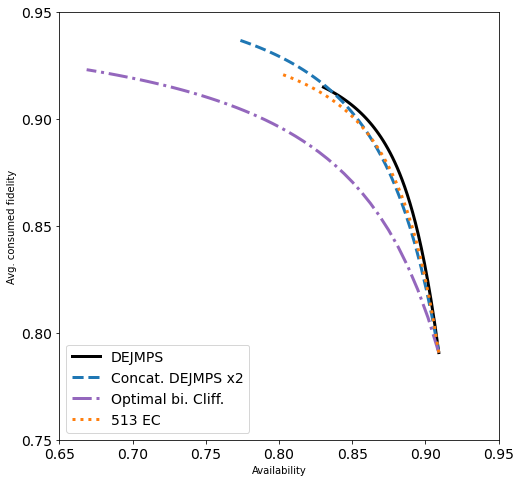

In [12]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in policy_names]
A_theory_vec = [[] for policy in policy_names]

for idx_policy, policy_name in enumerate(policy_names):

    purif_policy = main.policy_label_to_function(policy_name)
    
    for q_purif in q_purif_vec:
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        Fcons_theory_vec[idx_policy] += [Fcons]
        A_theory_vec[idx_policy] += [A]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

## PLOT ##
if savefig:
    filename = 'figs/AF_nested-vs-concat'
    filename += '_n%d_pgen%.3f_pcons%.3f_rhodiag-%.3f-%.3f-%.3f-%.3f_swapandpur%s_G%.5f.pdf'%(n,
                    p_gen, p_cons, rho_new[0][0], rho_new[1][1], rho_new[2][2], rho_new[3][3],
                    pur_after_swap, Gamma)
else:
    filename = None
main.AFplot(policy_names, sim_data=None, theory_data=theory_data, filename=filename,
            colors=colors, linestyles=linestyles)

---
---
## Interactive plot

In [2]:
%matplotlib inline

In [27]:
imp.reload(main)

policy_names = ['Replacement']+['Concat. DEJMPS x'+str(i) for i in range(1,10)]
policy_names += ['Optimal bi. Cliff.', '513 EC']

main.AFplot_interactive(policy_names)

interactive(children=(IntSlider(value=1, description='n', layout=Layout(width='60%'), max=15, min=1), FloatSli…

---
---
## Paper plots

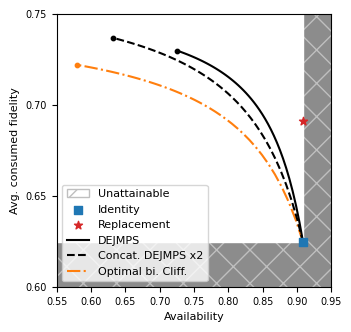

In [124]:
n = 4

# GEN
p_gen = 0.8
F_new = 0.7
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = np.linspace(0,1,50)
varying_param = 'q_purif'
policy_names = ['DEJMPS', 'Concat. DEJMPS x2', 'Optimal bi. Cliff.']
pur_after_swap = False

# NOISE
Gamma = 0.02 #1/5

# CONS
p_cons = 0.1

# Plot
colors = ['k', 'k', 'tab:orange', 'tab:orange']
linestyles = ['-', '--', '-.', ':']
savefig = False


## RUN ##
imp.reload(main)
main.AFplot_vs_id_vs_repl(varying_param, n, p_gen, rho_new, q_purif, policy_names,
                          pur_after_swap, Gamma, p_cons, ylims=[0.6,0.75],
                          colors=colors, linestyles=linestyles, savefig=savefig)

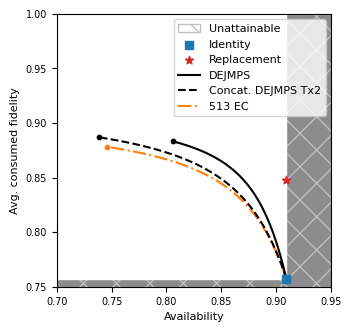

In [4]:
n = 5

# GEN
p_gen = 1
F_new = 0.86
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = np.linspace(0,1,50)
varying_param = 'q_purif'
policy_names = ['DEJMPS', 'Concat. DEJMPS Tx2', '513 EC']
pur_after_swap = False

# NOISE
Gamma = 0.02 #1/5

# CONS
p_cons = 0.1

# Plot
colors = ['k', 'k', 'tab:orange', 'tab:orange']
linestyles = ['-', '--', '-.', ':']
savefig = True



## RUN ##
imp.reload(main)
print('WARNING: for the plot in the paper, we twirl the state before the last '+
      'round of DEJMPS. Hence, we must use <<Concat. DEJMPS Tx>> instead of <<Concat. DEJMPS x>>')
main.AFplot_vs_id_vs_repl(varying_param, n, p_gen, rho_new, q_purif, policy_names,
                          pur_after_swap, Gamma, p_cons, ylims=[0.75,1],
                          colors=colors, linestyles=linestyles, savefig=savefig)

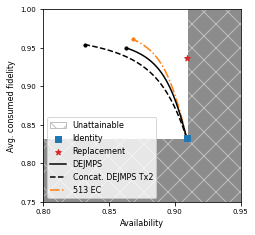

In [70]:
n = 5

# GEN
p_gen = 1
F_new = 0.95
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = np.linspace(0,1,50)
varying_param = 'q_purif'
policy_names = ['DEJMPS', 'Concat. DEJMPS Tx2', '513 EC']
pur_after_swap = False

# NOISE
Gamma = 0.02 #1/5

# CONS
p_cons = 0.1

# Plot
colors = ['k', 'k', 'tab:orange', 'tab:orange']
linestyles = ['-', '--', '-.', ':']
savefig = True



## RUN ##
imp.reload(main)
print('WARNING: for the plot in the paper, we twirl the state before the last '+
      'round of DEJMPS. In the code, one needs to set the TWIRL if-statement to True '+
      'in policy_concatDEJMPS().')
main.AFplot_vs_id_vs_repl(varying_param, n, p_gen, rho_new, q_purif, policy_names,
                          pur_after_swap, Gamma, p_cons, ylims=[0.75,1],
                          colors=colors, linestyles=linestyles, savefig=savefig)

In [73]:
A_new = 0.95

theta = 0.404 + 0.596 * np.exp( -(A_new-1)**2 / (2*0.199**2) )
sigma00 = 0.669 + 0.331 * np.exp( -(A_new-1)**2 / (2*0.136**2) )

print('theta =',theta)
print('sigma00 =',sigma00)

theta = 0.981481153708304
sigma00 = 0.9783694505191729
